<a href="https://colab.research.google.com/github/hamidrezanorouzi/numericalMethods/blob/main/Lectures/Lecture08_solving_ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Notes**❕
This content forms a part of the instructional presentations for the **`numerical methods in chemical engineering`** course designed for undergraduate chemical engineering students at Amirkabir University of Technology.

Feel free to utilize the information and source codes provided in this material, ensuring appropriate acknowledgment of the original document.

The visual elements featured in this document have been sourced from the following sources, unless specified otherwise:

* Steven C. Chapra, Applied Numerical Methods with Matlab for Engineers and Scientists, 3rd edition, McGraw-Hill (2012).


<div align="center">
🟪 🟪 🟪
</dive>

---

# 🔴 1) Where do we face with solving ODEs?

## 1-1) Chemical Reactor Modeling (from a few to tens of equations)
* ODEs are used to model and simulate chemical reactions in reactors.

<table width="100%">
<tr>
<td width = "65%">

* For example, the kinetics of a chemical reaction in a batch reactor can be described using ODEs to predict how concentrations of reactants and products change over time within the reactor.
Certainly! Let's consider a chemical reactor with two competing reactions:

1. **Reaction 1:** A + B → C
2. **Reaction 2:** C → D


* We can describe the concentrations of the species A, B, C, and D over time using a system of ODEs:

\begin{aligned}
\frac{d[A]}{dt} &= -k_1[A][B] \\
\frac{d[B]}{dt} &= -k_1[A][B] \\
\frac{d[C]}{dt} &= k_1[A][B] - k_2[C] \\
\frac{d[D]}{dt} &= k_2[C] \\
\end{aligned}


</td>
<td>
<div align = "center">
<img src = "https://drive.google.com/uc?id=1KZBPBqW-yKlTQnqDhtMVmEYByhVMiK5Q" width ="200">
</div>
</td>
</tr>
</table>


* These equations describe how the concentrations of A, B, C, and D change over time due to the competing reactions.

* This system of ODEs can be solved numerically to predict how the concentrations of A, B, C, and D evolve over time in the chemical reactor as the reactions occur.



## 1-2) Heat transfer in a sphere (one equation)

<table width="100%">
<tr>
<td width = "65%">

* The ODE for lumped heat transfer in a solid sphere can be written as follows:

 $$\rho V C_p \frac{dT}{dt} = h A_s (T_{∞} - T)$$

 Here:
 - $T$ is the temperature of the solid sphere as a function of time $t$ (the dependent variable).
 - $\rho$ is the density of the material.
 - $V$ is the volume of the sphere.
 - $C_p$ is the specific heat capacity of the material.

 - $h$ is the convective heat transfer coefficient between the sphere's surface and the surrounding fluid.
 - $A_s$ is the surface area of the sphere.
 - $T_{∞}$ is the temperature of the surrounding fluid (often assumed to be constant).

* Solving this ODE allows you to predict how the temperature of the solid sphere evolves over time when subjected to convective heat transfer.

</td>
<td>
<div align = "center">
<img src = "https://drive.google.com/uc?id=1pe2gJX5_w3H8x69ydZPyojlX3rYHCMvL" width ="300">
</div>
</td>
</tr>
</table>







## 1-3) Heat Transfer (tens to thousands equations)
* You have a one-dimensional solid rod of length $L$, and you want to model the temperature distribution along the rod as heat is conducted through it, $T(x, t)$:

 $$\rho c \frac{\partial T}{\partial t} = \frac{\partial}{\partial x}\left(k \frac{\partial T}{\partial x}\right)$$

 Here:
 - $T(x, t)$ is the temperature as a function of position $x$ along the rod and time $t$.
 - $\rho$ is the density of the material.
 - $c$ is the specific heat capacity of the material.
 - $k$ is the thermal conductivity of the material.



<div align="center">
<img src="https://drive.google.com/uc?id=1fSBtHdpahzyAET2SDMlGMc_wD4wT-k8P" width ="500">
</div>


* **Solution (method of lines):** You can discretize the rod into small segments and approximate the derivatives with finite differences. This will convert the PDE into a system of ODEs. For example, using the finite-difference method, you can write an ODE for each segment of the rod:

$$\frac{dT_i}{dt} = \frac{k}{\rho c}\left(\frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta x^2}\right)$$

Here:
- $T_i$ is the temperature at the $i$-th segment.
- $\Delta x$ is the length of each segment.


# 2) Overview of one-step integration of ODEs


* An ODE can be expressed as:
 $$
\begin{aligned}
y^{'} &= \frac{dy}{dt} = f(t,y)  \ \ \ \text{or} \\  y^{'} &= \frac{dy}{dx} = f(x,y)
\end{aligned}
\tag{2-1}
 $$
 Here,
 * $y$ is dependent vairable, and
 * $x$ and $t$ are dependent variables.

* In general, **one-step integration** methods can be formulated as:
$$
new \ value = old \ value + step \ size × slope
\tag{2-2}
$$
* and in mathematical terms:
$$
y_{i+1} = y_i + h ϕ
\tag{2-3}
$$
 Here:
 * $y_i$ is the value dependent variable at $x_i$
 * $y_{i+1}$ is the new value of dependent variable at $x_{i+1} = x_i + h$.
 * $\phi$ is the increament function.
 * $h$ is step size for integration.

# 3) Euler's mehtod

<table width="100%">
<tr>
<td width = "60%">

* The first derivative provides a direct estimate of the slope at $t_i$:

$$
\begin{aligned}
\phi &= f(t_i,y_i)  \\
y_{i+1} &= y_i + f(t_i,y_i) h
\end{aligned}
\tag{3-1}
$$

</td>
<td>
<div align = "center">
<img src = "https://drive.google.com/uc?id=1ab4HRwjkkTpOPfOveD-1rzDlgeY_Wsb4" width ="500">
</div>
</td>
</tr>
</table>



### ❓ **Example 1:**
Integrate the following equation using Euler’s method in the range [0,4] with $h = 1$ and $y(0) = 2$. Compare your results with the exact solution, $y=e^{-0.5 t} (-1.07692 + 3.07692 e^{1.3 t})$.
$$
y^{'}=4e^{0.8t}-0.5y
$$



💡 *Solution*



## 2-1) Code for Euler's method

In [11]:
import numpy as np

def EulerMethod(dfx, y0, a, b , n):

  h = (b-a)/n

  y = np.zeros((n+1,))
  x = np.zeros((n+1,))

  y[0] = y0;
  x[0] = a;

  for i in range(n):
    y[i+1] = y[i] + h * dfx(x[i],y[i])
    x[i+1] = a + (i+1)*h;

  return y, x

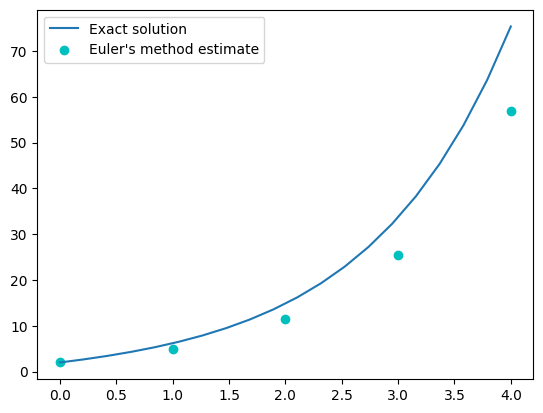

In [28]:
import matplotlib.pyplot as plt

# ode
example1Dfx = lambda t,y: 4*np.exp(0.8*t) - 0.5*y
# solution of ode
y , t = EulerMethod(example1Dfx, 2.0, 0.0, 4.0, 4)

# exact solution
fx_exact = lambda t : np.exp(-0.5*t) * (-1.07692 + 3.07692 * np.exp(1.3*t))
tt = np.linspace(0,4,20)
y_exact = [fx_exact(ti) for ti in tt]

# plot
plt.plot(tt,y_exact)
plt.scatter(t,y,c='c')
plt.legend(["Exact solution", "Euler's method estimate"])
plt.show()

## 3-2) Error analysis of Euler method

# 4) Modified Euler (Heun)

# 5) Midpoint method

# 6) Runge-Kutta methods

# 7) Extension to system of equations

# 8) Adaptive Range-Kutta methods